In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\DataScience\Python\Loan Prediction.csv')

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.describe().style.format(precision=2).background_gradient(cmap='RdPu')

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00
mean,126000.50,4997116.67,49.95,10.08,6.33,12.00,0.12
std,72746.28,2878311.01,17.06,6.00,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.00,0.00
50%,126000.50,5000694.50,50.00,10.00,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.00,0.00
max,252000.00,9999938.00,79.00,20.00,14.00,14.00,1.00


In [20]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns.')

There are 252000 rows and 13 columns.


In [22]:
integer = 0  #Initialize a counter for numeric columns
category = 0 #Initialize a counter for categorical columns

# Iterate through each column's data type in the dataframe
for i in df.dtypes:
    if i == 'int64' or i == 'float':  #check if the datatype is numeric
        integer += 1 #Increment the counter for numeric columns
    
    elif i == 'object': #check if the datatype is categorical
        category += 1 #Increment the counter for categorical colummns

# print the total count of numeric and categorical columns
print(f'There are {integer} numeric and {category} categorical columns in the dataset')

There are 7 numeric and 6 categorical columns in the dataset


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [28]:
print('No of missing values in the dataset')

# calculate the percentage of missing values in each column
df.isnull().sum()/len(df) * 100

No of missing values in the dataset


Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

Heatmap of missing values


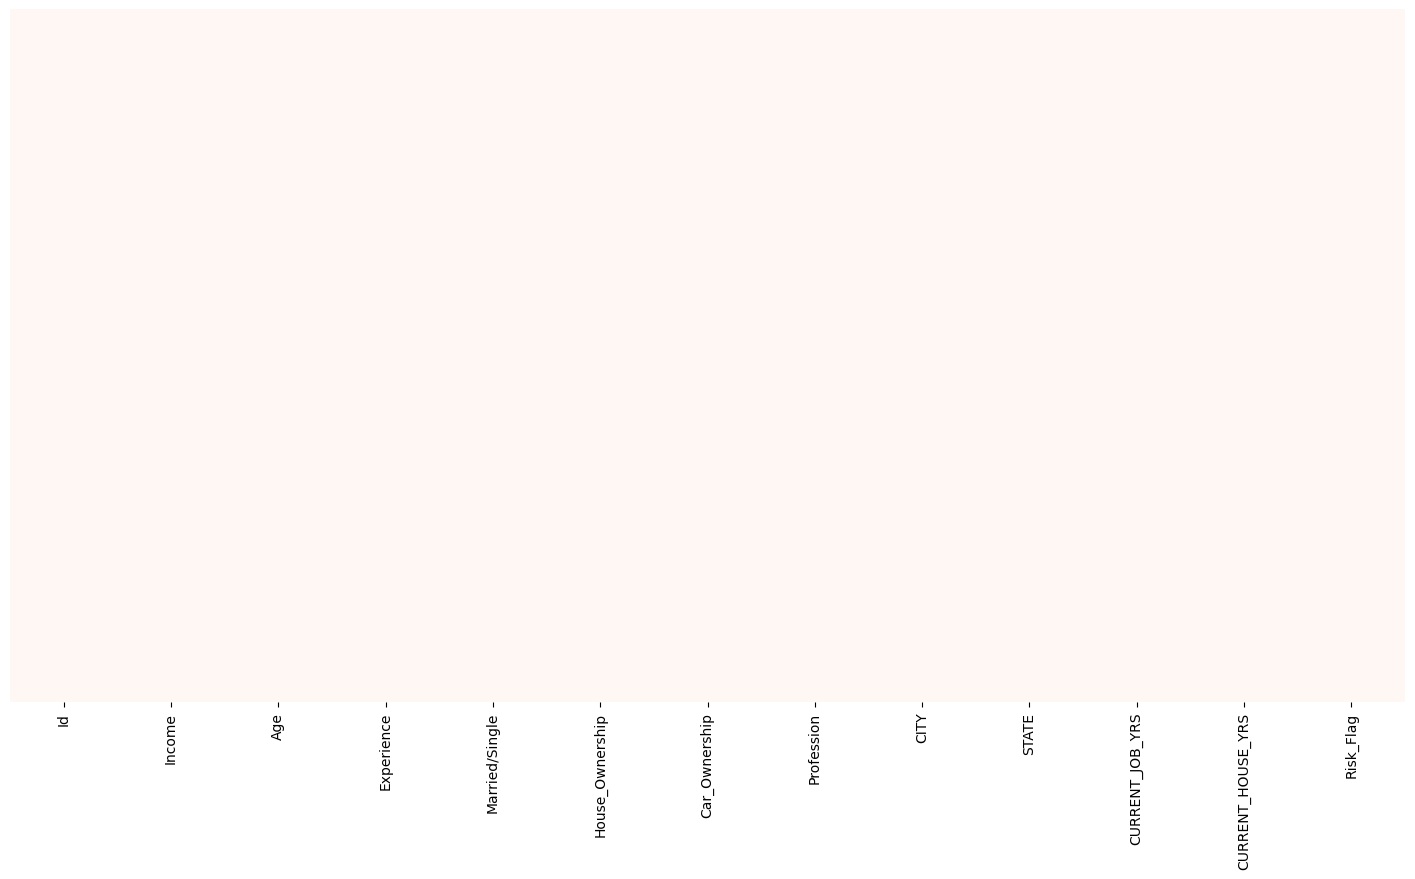

In [10]:
# heatmap of missing values
print('Heatmap of missing values')
plt.figure(figsize=(18,9))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.show()

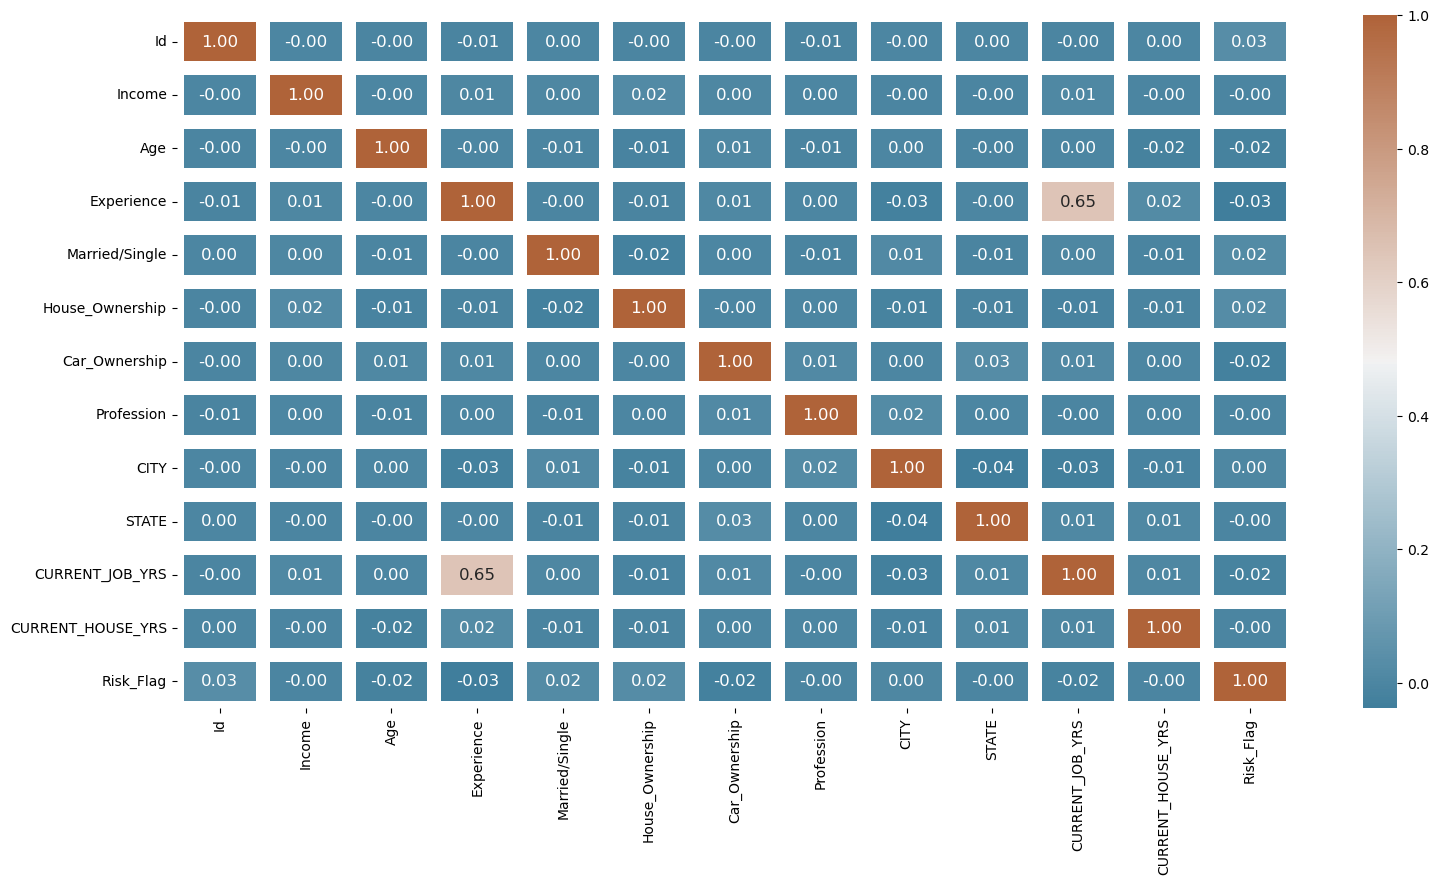

In [37]:
# correlation matrix
from sklearn.preprocessing import LabelEncoder
df_corr = df.copy()

# label encode categorical columns
for i in df_corr.columns:
    if df_corr[i].dtype == 'object':
        df_corr[i] = LabelEncoder().fit_transform(df[i])

plt.figure(figsize=(18,9), facecolor='none')  # set the facecolor to 'none' to make the background transparent

#define colormap
cmap = sns.diverging_palette(230, 30, as_cmap=True)

#define annotation text size
size = {'size': 12}

# plot heatmap
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap=cmap, 
    square=False,
    linewidths=10,
    fmt='.2f',
    annot_kws = size #Adjust annotation text size

)
plt.show()

In [11]:
# creating new column based on age
labels = ['Young age', 'Middle age', 'Old age']

# determine the minimum, maximum and average age
minn = df['Age'].min()
maxx = df['Age'].max()
avg = df['Age'].mean()

# define the bins for each age category
bins = [minn, 30, avg+5, maxx]

# Bin the age column and assign the corresponding category labels
df['Age_category'] = pd.cut(df['Age'], labels = labels, bins=bins)
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_category
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Young age
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Middle age
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Old age
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Middle age
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Middle age
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Young age
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,Middle age
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,Middle age


In [49]:
# data exploration
df.groupby('Id')['Income'].max().sort_values(ascending=False).head()

Id
229020    9999938
225536    9999400
178371    9999180
21755     9999180
162107    9999180
Name: Income, dtype: int64

In [51]:
# data exploration
print('Top 5 costumers with the highest income')

df['Income'].nlargest(5)

Top 5 costumers with the highest income


229019    9999938
225535    9999400
231       9999180
10980     9999180
16394     9999180
Name: Income, dtype: int64

In [55]:
# Top 10 costumers with the highest income along with their age, profession, house ownership, marital status
print('Top 10 costumers with the highest income along with their age, profession, house ownership, marital status')

top_10_customers = df.groupby(['Profession', 'House_Ownership', 'Married/Single', 'Age', 'CURRENT_JOB_YRS'])['Income'].max().sort_values(ascending=False).head(10)
top_10_customers

Top 10 costumers with the highest income along with their age, profession, house ownership, marital status


Profession                  House_Ownership  Married/Single  Age  CURRENT_JOB_YRS
Police_officer              rented           single          34   6                  9999938
Librarian                   rented           single          41   10                 9999400
Drafter                     rented           single          22   0                  9999180
Aviator                     rented           single          47   8                  9998280
Secretary                   rented           single          58   13                 9998070
Drafter                     owned            single          45   7                  9996969
                            rented           single          45   10                 9996947
Designer                    owned            single          50   10                 9996946
Statistician                owned            single          38   9                  9996861
Computer_hardware_engineer  rented           single          24   11             

In [58]:
# Average income of customers in the dataset
print('Average income of customers in the dataset')
avg = round(df['Income'].mean(), 2)
avg

Average income of customers in the dataset


4997116.67

In [60]:
print('Top 10 profession with their average income')
df.groupby('Profession')['Income'].mean().sort_values(ascending=False).head(10)

Top 10 profession with their average income


Profession
Petroleum_Engineer     5.443310e+06
Psychologist           5.357795e+06
Designer               5.336802e+06
Scientist              5.282710e+06
Surgeon                5.235359e+06
Comedian               5.199539e+06
Chemical_engineer      5.189805e+06
Mechanical_engineer    5.175032e+06
Artist                 5.164765e+06
Financial_Analyst      5.145753e+06
Name: Income, dtype: float64

In [63]:
print('Top 5 profession with their average income in Mumbai')
pro = df[df['CITY'] == 'Mumbai']['Profession'].value_counts().head(5)
pro

Top 5 profession with their average income in Mumbai


Profession
Civil_engineer    80
Web_designer      75
Engineer          70
Scientist         41
Technician        40
Name: count, dtype: int64

In [5]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [10]:
df['STATE'].nunique()

29

In [13]:
# Groups the Dataframe by 'Married/Single' and 'House_Ownership' columns and count the occurrences
mar_own = df.groupby('Married/Single')['House_Ownership'].value_counts().reset_index(name='count')
mar_own

,Married/Single,House_Ownership,count
0,married,rented,24210
1,married,owned,923
2,married,norent_noown,595
3,single,rented,207688
4,single,owned,11995
5,single,norent_noown,6589
